In [72]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# def display(im_path):
#     dpi = 80
#     im_data = im_path

#     height, width  = im_data.shape[:2]
    
#     # What size does the figure need to be in inches to fit the image?
#     figsize = width / float(dpi), height / float(dpi)

#     # Create a figure of the right size with one axes that takes up the full figure
#     fig = plt.figure(figsize=figsize)
#     ax = fig.add_axes([0, 0, 1, 1])

#     # Hide spines, ticks, etc.
#     ax.axis('off')

#     # Display the image.
#     ax.imshow(im_data, cmap='gray')

#     plt.show()

In [74]:
# def grayscale(image):
#     return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [75]:
# thresh, im_bw = cv2.threshold(gray_image, 200,230, cv2.THRESH_BINARY)

In [76]:
# def noise_removal(image):
#     kernel = np.ones((1,1), np.uint8)
#     image = cv2.dilate(image, kernel, iterations = 1)
#     kernel = np.ones((1,1), np.uint8)
#     image = cv2.erode(image,kernel,iterations = 1)
#     image = cv2.morphologyEx(image, cv2.MORPH_CLOSE,kernel)
#     image = cv2.medianBlur(image,3)
#     return(image)

In [77]:
# img_path = "italics.jpeg"
# img = cv2.imread(img_path)
# img = grayscale(img)
# threshold_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# display(threshold_img)

In [78]:
# def detect_italic_edges(image_path):
#     # Read the image
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Apply Canny edge detection
#     edges = cv2.Canny(img, 50, 150)

#     # Define the range of angles to search for
#     min_angle = np.pi / 12  # Approximately 12 degrees
#     max_angle = np.pi / 6   # Approximately 30 degrees

#     # Apply Hough Line Transform
#     lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

#     if lines is not None:
#         for rho, theta in lines[:, 0]:
#             # Check if the angle is within the desired range
#             if min_angle <= theta <= max_angle:
#                 # Convert polar coordinates to Cartesian coordinates
#                 a = np.cos(theta)
#                 b = np.sin(theta)
#                 x0 = a * rho
#                 y0 = b * rho

#                 # Compute endpoints of the line segment
#                 x1 = int(x0 + 1000 * (-b))
#                 y1 = int(y0 + 1000 * (a))
#                 x2 = int(x0 - 1000 * (-b))
#                 y2 = int(y0 - 1000 * (a))

#                 # Draw the line on the original image
#                 cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

#     # Display the result
#     cv2.imshow('Italic Edges', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# # Example usage:
# detect_italic_edges(img_path)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam
import random

In [80]:
image_list = os.listdir('C:/Users/Adars/OneDrive/Desktop/Samsung PRISM/Code/END_GAME/PageSegData/PageImg')
image_list = [filename.split(".")[0] for filename in image_list]

In [81]:
def visualize(img,seg_img):
    """
    Visualizes image
    """
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Image')
    plt.subplot(1,2,2)
    plt.imshow(seg_img,cmap='gray')
    plt.title('Segmented Image')
    plt.show()
    
def get_segmented_img(img,n_classes):
    """
    Loads in the segmented image and create suitable segmentation label.
    """
    seg_labels=np.zeros((512,512,1))
    img=cv2.resize(img,(512,512))
    img=img[:,:,0]
    cl_list=[0,24]

    
    seg_labels[:,:,0]=(img!=0).astype(int)


    return seg_labels
def preprocess_img(img):
    img=cv2.resize(img,(512,512))
    return img



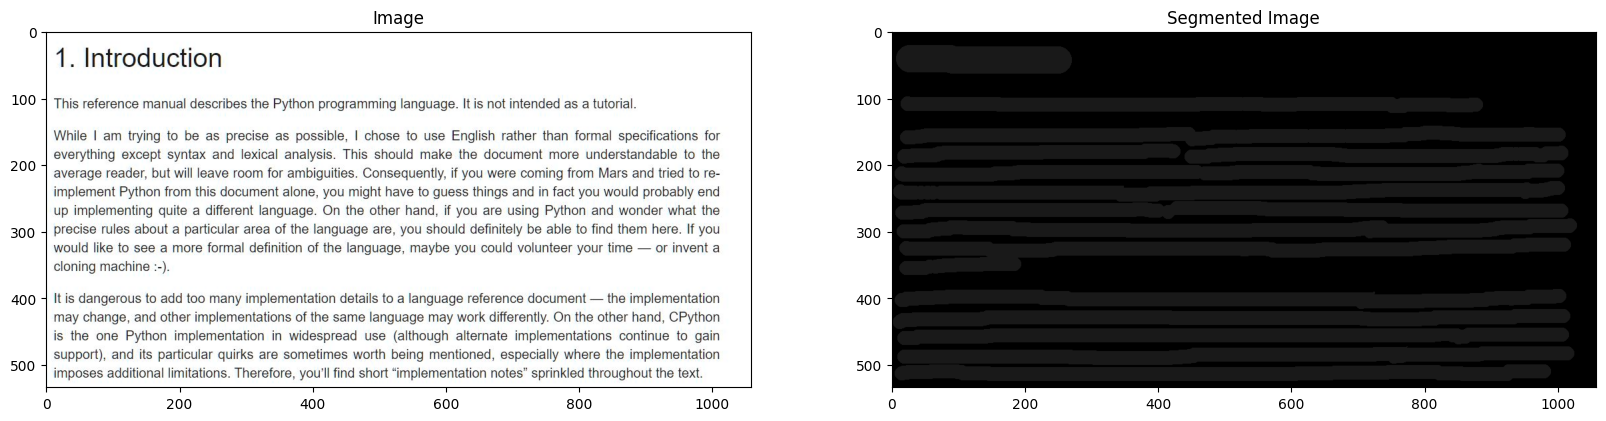

In [82]:
img=cv2.imread('C:/Users/Adars/OneDrive/Desktop/Samsung PRISM/Code/END_GAME/PageSegData/PageImg/'+image_list[0]+'.JPG',1)
seg=cv2.imread('C:/Users/Adars/OneDrive/Desktop/Samsung PRISM/Code/END_GAME/PageSegData/PageSeg/'+image_list[0]+'_mask.png',1)

visualize(img,seg)

In [51]:
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs,conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

#model = FCN(n_classes=2,  
            #  input_height=320, 
            #  input_width=320)
model=unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 256, 256, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [67]:
def batch_generator(filelist,n_classes,batch_size):
  while True:
    X=[]
    Y=[]
    for i in range(batch_size):
      fn=random.choice(filelist)
      img=cv2.imread(f'C:/Users/Adars/OneDrive/Desktop/Samsung PRISM/Code/END_GAME/PageSegData/PageImg/{fn}.JPG',0)
      ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
      img=cv2.resize(img,(512,512))
      img=np.expand_dims(img,axis=-1)
      img=img/255

      seg=cv2.imread(f'C:/Users/Adars/OneDrive/Desktop/Samsung PRISM/Code/END_GAME/PageSegData/PageSeg/{fn}_mask.png',1)
      seg=get_segmented_img(seg,n_classes)

      X.append(img)
      Y.append(seg)
    yield np.array(X),np.array(Y)

In [68]:
random.shuffle(image_list)
file_train=image_list[0:int(0.75*len(image_list))]
file_test=image_list[int(0.75*len(image_list)):]

In [69]:
# file_train

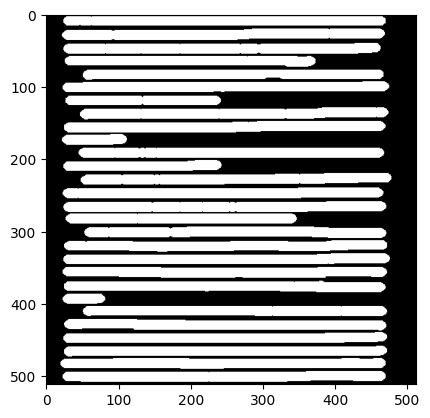

In [70]:
img,seg=next(batch_generator(file_train,2,1))
plt.imshow(np.squeeze(seg[:,:,:,0],axis=0),cmap='gray')

In [71]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, period=1)
model.fit_generator(batch_generator(file_train,2,2),epochs=3,steps_per_epoch=1000,validation_data=batch_generator(file_test,2,2),
                    validation_steps=400,callbacks=[mc],shuffle=1)

C:\Users\Adars\AppData\Local\Temp\ipykernel_7848\1253230913.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(batch_generator(file_train,2,2),epochs=3,steps_per_epoch=1000,validation_data=batch_generator(file_test,2,2),


Epoch 1/3



  89/1000 [=>............................] - ETA: 4:26:51 - loss: 0.6894 - accuracy: 0.6224


KeyboardInterrupt

